In [1]:
import os
import sys
# Set project path and module path before running the notebook
project_path = '/home/rajbisr/workplace/LLM-from-scratch'
os.chdir(project_path)
module_path = project_path + '/src'
if module_path not in sys.path:
    sys.path.append(module_path)

data_path = project_path + '/data'
# Download the eminem lyrics dataset
os.makedirs(data_path, exist_ok=True)
# !curl -L -o data/eminem-lyrics.zip https://www.kaggle.com/api/v1/datasets/download/aditya2803/eminem-lyrics
# !unzip data/eminem-lyrics.zip -d data/

model_save_path = project_path + '/models'
os.makedirs(model_save_path, exist_ok=True)

import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
from song_lyrics_generator.utils import get_token_encoder_decoder, get_bigram_mini_batch_samples
from song_lyrics_generator.models import BigramLM
from song_lyrics_generator.train import Trainer

/tmp/ipykernel_4187483/3036469044.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_text_encoded = torch.tensor(encode(all_text))
  1%|          | 72/10000 [00:00<00:47, 208.59it/s]

Epoch 0 | Train Loss: 4.972105674743652 | Val Loss: 4.995308361053467


  2%|▏         | 185/10000 [00:00<00:27, 359.48it/s]

Epoch 100 | Train Loss: 4.848088312149048 | Val Loss: 4.874375343322754


  2%|▏         | 235/10000 [00:00<00:28, 337.23it/s]

Epoch 200 | Train Loss: 4.72852165222168 | Val Loss: 4.736171112060547


  4%|▎         | 373/10000 [00:01<00:22, 427.59it/s]

Epoch 300 | Train Loss: 4.62626971244812 | Val Loss: 4.629303693771362


  5%|▍         | 496/10000 [00:01<00:20, 461.32it/s]

Epoch 400 | Train Loss: 4.517607011795044 | Val Loss: 4.518846025466919


  5%|▌         | 549/10000 [00:01<00:23, 408.93it/s]

Epoch 500 | Train Loss: 4.390474014282226 | Val Loss: 4.4127440261840825


  7%|▋         | 673/10000 [00:01<00:20, 451.20it/s]

Epoch 600 | Train Loss: 4.306351871490478 | Val Loss: 4.294648189544677


  8%|▊         | 796/10000 [00:02<00:19, 472.77it/s]

Epoch 700 | Train Loss: 4.176027803421021 | Val Loss: 4.205805158615112


  8%|▊         | 849/10000 [00:02<00:22, 415.56it/s]

Epoch 800 | Train Loss: 4.111379203796386 | Val Loss: 4.110794010162354


 10%|▉         | 972/10000 [00:02<00:19, 453.39it/s]

Epoch 900 | Train Loss: 3.992142424583435 | Val Loss: 4.029714374542237


 11%|█         | 1095/10000 [00:02<00:18, 474.85it/s]

Epoch 1000 | Train Loss: 3.935802626609802 | Val Loss: 3.9362115144729612


 11%|█▏        | 1148/10000 [00:03<00:21, 417.50it/s]

Epoch 1100 | Train Loss: 3.8466235065460204 | Val Loss: 3.8543991947174074


 13%|█▎        | 1273/10000 [00:03<00:19, 455.98it/s]

Epoch 1200 | Train Loss: 3.7674074745178223 | Val Loss: 3.763111228942871


 14%|█▍        | 1396/10000 [00:03<00:18, 475.49it/s]

Epoch 1300 | Train Loss: 3.6998204231262206 | Val Loss: 3.7057877349853516


 14%|█▍        | 1449/10000 [00:03<00:20, 417.31it/s]

Epoch 1400 | Train Loss: 3.617262749671936 | Val Loss: 3.6400389766693113


 16%|█▌        | 1573/10000 [00:03<00:18, 454.21it/s]

Epoch 1500 | Train Loss: 3.572311701774597 | Val Loss: 3.5637705373764037


 17%|█▋        | 1695/10000 [00:04<00:17, 472.96it/s]

Epoch 1600 | Train Loss: 3.5043477487564085 | Val Loss: 3.510666308403015


 17%|█▋        | 1748/10000 [00:04<00:19, 415.71it/s]

Epoch 1700 | Train Loss: 3.4368646240234373 | Val Loss: 3.445551791191101


 19%|█▊        | 1873/10000 [00:04<00:17, 455.20it/s]

Epoch 1800 | Train Loss: 3.3775086545944215 | Val Loss: 3.405780110359192


 20%|█▉        | 1996/10000 [00:04<00:16, 474.55it/s]

Epoch 1900 | Train Loss: 3.3395758056640625 | Val Loss: 3.346539635658264


 20%|██        | 2049/10000 [00:05<00:19, 417.63it/s]

Epoch 2000 | Train Loss: 3.302058753967285 | Val Loss: 3.288960738182068


 22%|██▏       | 2173/10000 [00:05<00:17, 456.22it/s]

Epoch 2100 | Train Loss: 3.2329001522064207 | Val Loss: 3.2466191482543945


 23%|██▎       | 2296/10000 [00:05<00:16, 476.95it/s]

Epoch 2200 | Train Loss: 3.1905665969848633 | Val Loss: 3.1974257040023804


 23%|██▎       | 2349/10000 [00:05<00:18, 419.75it/s]

Epoch 2300 | Train Loss: 3.144518966674805 | Val Loss: 3.1478010606765747


 25%|██▍       | 2473/10000 [00:06<00:16, 458.38it/s]

Epoch 2400 | Train Loss: 3.1189487838745116 | Val Loss: 3.130821256637573


 26%|██▌       | 2596/10000 [00:06<00:15, 477.44it/s]

Epoch 2500 | Train Loss: 3.0622384691238405 | Val Loss: 3.079996395111084


 26%|██▋       | 2649/10000 [00:06<00:17, 419.25it/s]

Epoch 2600 | Train Loss: 3.0167465448379516 | Val Loss: 3.056574058532715


 28%|██▊       | 2773/10000 [00:06<00:15, 455.90it/s]

Epoch 2700 | Train Loss: 2.9988306665420534 | Val Loss: 3.026289396286011


 29%|██▉       | 2896/10000 [00:07<00:14, 475.67it/s]

Epoch 2800 | Train Loss: 2.958748083114624 | Val Loss: 2.9778915548324587


 29%|██▉       | 2949/10000 [00:07<00:16, 418.28it/s]

Epoch 2900 | Train Loss: 2.943198728561401 | Val Loss: 2.971987762451172


 31%|███       | 3073/10000 [00:07<00:15, 456.22it/s]

Epoch 3000 | Train Loss: 2.925581207275391 | Val Loss: 2.924047818183899


 32%|███▏      | 3196/10000 [00:07<00:14, 476.00it/s]

Epoch 3100 | Train Loss: 2.8998273992538453 | Val Loss: 2.894758768081665


 32%|███▏      | 3249/10000 [00:07<00:16, 418.40it/s]

Epoch 3200 | Train Loss: 2.857665219306946 | Val Loss: 2.869044151306152


 34%|███▎      | 3373/10000 [00:08<00:14, 456.62it/s]

Epoch 3300 | Train Loss: 2.847597403526306 | Val Loss: 2.836377100944519


 35%|███▍      | 3496/10000 [00:08<00:13, 476.58it/s]

Epoch 3400 | Train Loss: 2.8411822080612184 | Val Loss: 2.830391502380371


 35%|███▌      | 3549/10000 [00:08<00:15, 418.42it/s]

Epoch 3500 | Train Loss: 2.8084418535232545 | Val Loss: 2.8065666151046753


 37%|███▋      | 3673/10000 [00:08<00:13, 456.44it/s]

Epoch 3600 | Train Loss: 2.792010979652405 | Val Loss: 2.797367787361145


 38%|███▊      | 3796/10000 [00:09<00:13, 475.80it/s]

Epoch 3700 | Train Loss: 2.7594980812072754 | Val Loss: 2.7904301834106446


 38%|███▊      | 3849/10000 [00:09<00:14, 417.97it/s]

Epoch 3800 | Train Loss: 2.74371639251709 | Val Loss: 2.7535510730743407


 40%|███▉      | 3973/10000 [00:09<00:13, 455.52it/s]

Epoch 3900 | Train Loss: 2.7308175230026244 | Val Loss: 2.7309021759033203


 41%|████      | 4096/10000 [00:09<00:12, 476.27it/s]

Epoch 4000 | Train Loss: 2.7103646850585936 | Val Loss: 2.7357366943359374


 41%|████▏     | 4149/10000 [00:10<00:13, 418.86it/s]

Epoch 4100 | Train Loss: 2.7111316251754762 | Val Loss: 2.71314302444458


 43%|████▎     | 4273/10000 [00:10<00:12, 456.99it/s]

Epoch 4200 | Train Loss: 2.6917263078689575 | Val Loss: 2.702599401473999


 44%|████▍     | 4395/10000 [00:10<00:11, 474.15it/s]

Epoch 4300 | Train Loss: 2.6689521265029907 | Val Loss: 2.6953241777420045


 44%|████▍     | 4448/10000 [00:10<00:13, 416.46it/s]

Epoch 4400 | Train Loss: 2.676759524345398 | Val Loss: 2.671027240753174


 46%|████▌     | 4573/10000 [00:11<00:11, 455.40it/s]

Epoch 4500 | Train Loss: 2.644095959663391 | Val Loss: 2.664266686439514


 47%|████▋     | 4696/10000 [00:11<00:11, 474.98it/s]

Epoch 4600 | Train Loss: 2.659723515510559 | Val Loss: 2.6691345167160034


 47%|████▋     | 4749/10000 [00:11<00:12, 417.81it/s]

Epoch 4700 | Train Loss: 2.647709493637085 | Val Loss: 2.6483036565780638


 49%|████▊     | 4873/10000 [00:11<00:11, 456.35it/s]

Epoch 4800 | Train Loss: 2.62397189617157 | Val Loss: 2.6431849193573


 50%|████▉     | 4995/10000 [00:12<00:10, 471.86it/s]

Epoch 4900 | Train Loss: 2.649586033821106 | Val Loss: 2.6090197563171387


 50%|█████     | 5048/10000 [00:12<00:11, 412.86it/s]

Epoch 5000 | Train Loss: 2.610503635406494 | Val Loss: 2.6369046545028687


 52%|█████▏    | 5172/10000 [00:12<00:10, 450.66it/s]

Epoch 5100 | Train Loss: 2.6455101490020754 | Val Loss: 2.6067151498794554


 53%|█████▎    | 5295/10000 [00:12<00:09, 473.17it/s]

Epoch 5200 | Train Loss: 2.5969653511047364 | Val Loss: 2.623830108642578


 53%|█████▎    | 5348/10000 [00:12<00:11, 416.80it/s]

Epoch 5300 | Train Loss: 2.605022349357605 | Val Loss: 2.6045735692977905


 55%|█████▍    | 5472/10000 [00:13<00:09, 455.00it/s]

Epoch 5400 | Train Loss: 2.5989007425308226 | Val Loss: 2.6059619903564455


 56%|█████▌    | 5595/10000 [00:13<00:09, 475.01it/s]

Epoch 5500 | Train Loss: 2.5991793155670164 | Val Loss: 2.577169489860535


 56%|█████▋    | 5648/10000 [00:13<00:10, 417.08it/s]

Epoch 5600 | Train Loss: 2.5799707412719726 | Val Loss: 2.5866601276397705


 58%|█████▊    | 5773/10000 [00:13<00:09, 454.77it/s]

Epoch 5700 | Train Loss: 2.5736054039001464 | Val Loss: 2.6009754657745363


 59%|█████▉    | 5896/10000 [00:14<00:08, 474.35it/s]

Epoch 5800 | Train Loss: 2.5653187084197997 | Val Loss: 2.5769883680343626


 59%|█████▉    | 5949/10000 [00:14<00:09, 417.70it/s]

Epoch 5900 | Train Loss: 2.5888784027099607 | Val Loss: 2.574225583076477


 61%|██████    | 6073/10000 [00:14<00:08, 456.12it/s]

Epoch 6000 | Train Loss: 2.5804409980773926 | Val Loss: 2.5887054109573366


 62%|██████▏   | 6196/10000 [00:14<00:07, 476.10it/s]

Epoch 6100 | Train Loss: 2.5592059326171874 | Val Loss: 2.5583010387420653


 62%|██████▏   | 6249/10000 [00:14<00:08, 417.70it/s]

Epoch 6200 | Train Loss: 2.551415762901306 | Val Loss: 2.5737343549728395


 64%|██████▎   | 6373/10000 [00:15<00:07, 455.41it/s]

Epoch 6300 | Train Loss: 2.5488029193878172 | Val Loss: 2.56980318069458


 65%|██████▍   | 6496/10000 [00:15<00:07, 476.28it/s]

Epoch 6400 | Train Loss: 2.544983830451965 | Val Loss: 2.54457311630249


 65%|██████▌   | 6549/10000 [00:15<00:08, 418.45it/s]

Epoch 6500 | Train Loss: 2.5571365642547605 | Val Loss: 2.5617080974578856


 67%|██████▋   | 6673/10000 [00:15<00:07, 457.62it/s]

Epoch 6600 | Train Loss: 2.5443179750442506 | Val Loss: 2.5516297674179076


 68%|██████▊   | 6796/10000 [00:16<00:06, 476.69it/s]

Epoch 6700 | Train Loss: 2.536010909080505 | Val Loss: 2.5375979566574096


 68%|██████▊   | 6849/10000 [00:16<00:07, 419.03it/s]

Epoch 6800 | Train Loss: 2.548862171173096 | Val Loss: 2.543337707519531


 70%|██████▉   | 6973/10000 [00:16<00:06, 456.68it/s]

Epoch 6900 | Train Loss: 2.5440166711807253 | Val Loss: 2.54275306224823


 71%|███████   | 7096/10000 [00:16<00:06, 477.51it/s]

Epoch 7000 | Train Loss: 2.546528387069702 | Val Loss: 2.5482845640182497


 71%|███████▏  | 7149/10000 [00:17<00:06, 419.71it/s]

Epoch 7100 | Train Loss: 2.5451634979248046 | Val Loss: 2.5376081609725953


 73%|███████▎  | 7273/10000 [00:17<00:05, 456.47it/s]

Epoch 7200 | Train Loss: 2.549232840538025 | Val Loss: 2.557158899307251


 74%|███████▍  | 7396/10000 [00:17<00:05, 475.89it/s]

Epoch 7300 | Train Loss: 2.511860842704773 | Val Loss: 2.5541769790649416


 74%|███████▍  | 7449/10000 [00:17<00:06, 419.10it/s]

Epoch 7400 | Train Loss: 2.5229067611694336 | Val Loss: 2.5399468755722046


 76%|███████▌  | 7573/10000 [00:18<00:05, 457.47it/s]

Epoch 7500 | Train Loss: 2.5202976989746095 | Val Loss: 2.524906888008118


 77%|███████▋  | 7696/10000 [00:18<00:04, 476.94it/s]

Epoch 7600 | Train Loss: 2.5048610019683837 | Val Loss: 2.527922525405884


 77%|███████▋  | 7749/10000 [00:18<00:05, 419.84it/s]

Epoch 7700 | Train Loss: 2.5208233785629273 | Val Loss: 2.52147789478302


 79%|███████▊  | 7872/10000 [00:18<00:04, 456.42it/s]

Epoch 7800 | Train Loss: 2.528068199157715 | Val Loss: 2.5248818302154543


 80%|███████▉  | 7995/10000 [00:19<00:04, 476.22it/s]

Epoch 7900 | Train Loss: 2.515790481567383 | Val Loss: 2.530958924293518


 80%|████████  | 8048/10000 [00:19<00:04, 419.01it/s]

Epoch 8000 | Train Loss: 2.515733280181885 | Val Loss: 2.5334606313705446


 82%|████████▏ | 8173/10000 [00:19<00:03, 457.49it/s]

Epoch 8100 | Train Loss: 2.528368396759033 | Val Loss: 2.525671944618225


 83%|████████▎ | 8296/10000 [00:19<00:03, 477.19it/s]

Epoch 8200 | Train Loss: 2.5043452548980714 | Val Loss: 2.534056100845337


 83%|████████▎ | 8349/10000 [00:19<00:03, 419.29it/s]

Epoch 8300 | Train Loss: 2.514565963745117 | Val Loss: 2.52272910118103


 85%|████████▍ | 8472/10000 [00:20<00:03, 455.10it/s]

Epoch 8400 | Train Loss: 2.512827572822571 | Val Loss: 2.525966854095459


 86%|████████▌ | 8595/10000 [00:20<00:02, 475.06it/s]

Epoch 8500 | Train Loss: 2.4970673751831054 | Val Loss: 2.50636483669281


 86%|████████▋ | 8648/10000 [00:20<00:03, 417.47it/s]

Epoch 8600 | Train Loss: 2.520266137123108 | Val Loss: 2.514740238189697


 88%|████████▊ | 8773/10000 [00:20<00:02, 457.26it/s]

Epoch 8700 | Train Loss: 2.5202382040023803 | Val Loss: 2.5083997774124147


 89%|████████▉ | 8895/10000 [00:21<00:02, 474.24it/s]

Epoch 8800 | Train Loss: 2.519297385215759 | Val Loss: 2.5222619152069092


 89%|████████▉ | 8948/10000 [00:21<00:02, 416.86it/s]

Epoch 8900 | Train Loss: 2.494547824859619 | Val Loss: 2.5171241092681886


 91%|█████████ | 9073/10000 [00:21<00:02, 456.09it/s]

Epoch 9000 | Train Loss: 2.5241423797607423 | Val Loss: 2.5248401165008545


 92%|█████████▏| 9196/10000 [00:21<00:01, 476.12it/s]

Epoch 9100 | Train Loss: 2.5085107326507567 | Val Loss: 2.502544813156128


 92%|█████████▏| 9249/10000 [00:22<00:01, 418.05it/s]

Epoch 9200 | Train Loss: 2.523954405784607 | Val Loss: 2.514512872695923


 94%|█████████▎| 9372/10000 [00:22<00:01, 453.17it/s]

Epoch 9300 | Train Loss: 2.517483959197998 | Val Loss: 2.511851773262024


 95%|█████████▍| 9495/10000 [00:22<00:01, 473.45it/s]

Epoch 9400 | Train Loss: 2.5003808403015135 | Val Loss: 2.5085398817062377


 95%|█████████▌| 9548/10000 [00:22<00:01, 417.02it/s]

Epoch 9500 | Train Loss: 2.488792200088501 | Val Loss: 2.510127067565918


 97%|█████████▋| 9673/10000 [00:23<00:00, 456.01it/s]

Epoch 9600 | Train Loss: 2.4889605140686033 | Val Loss: 2.531407675743103


 98%|█████████▊| 9796/10000 [00:23<00:00, 475.41it/s]

Epoch 9700 | Train Loss: 2.507529911994934 | Val Loss: 2.5062997913360596


 98%|█████████▊| 9849/10000 [00:23<00:00, 417.54it/s]

Epoch 9800 | Train Loss: 2.5072296762466433 | Val Loss: 2.5204120779037478


100%|██████████| 10000/10000 [00:23<00:00, 420.97it/s]

Epoch 9900 | Train Loss: 2.511713032722473 | Val Loss: 2.5011311101913454


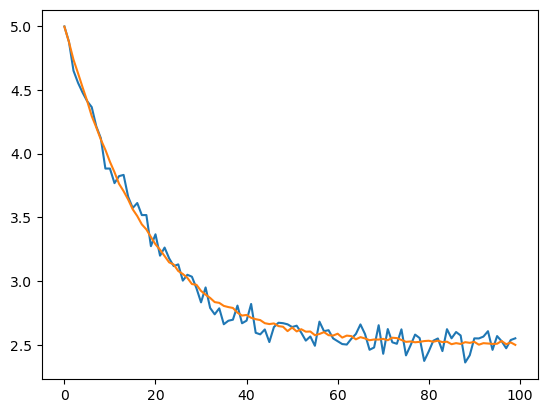

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Read the data into a DataFrame
df = pd.read_csv('data/Eminem_Lyrics.csv', sep='\t', comment='#', encoding = "ISO-8859-1")

# Preprocessing

# 1. Remove '\x82', '\x85', '\x91', '\x92', '\x93', '\x94', '\x96', '\x97' from lyrics text
df.Lyrics = df.Lyrics.str.replace('\x82', '')
df.Lyrics = df.Lyrics.str.replace('\x85', '')
df.Lyrics = df.Lyrics.str.replace('\x91', '')
df.Lyrics = df.Lyrics.str.replace('\x92', '')
df.Lyrics = df.Lyrics.str.replace('\x93', '')
df.Lyrics = df.Lyrics.str.replace('\x94', '')
df.Lyrics = df.Lyrics.str.replace('\x96', '')
df.Lyrics = df.Lyrics.str.replace('\x97', '')

# 2. Creating the character set to represent characters as integers based on their index
#   in the sorted character set
all_text = '\n'.join(df.Lyrics)
chars = sorted(list(set(all_text)))
encode, decode, encoder, decoder = get_token_encoder_decoder(chars, device)

# 3. Encoding all the lyrics
all_text_encoded = torch.tensor(encode(all_text))

# 4. Creating train/ validation split
split_index = int(len(all_text_encoded) * 0.9)
train_data = all_text_encoded[:split_index]
val_data = all_text_encoded[split_index:]

# Setting global variables
BATCH_SIZE = 32
BLOCK_SIZE = 8
NUM_EPOCHS = 10000
EVAL_INTERVAL = 100
EVAL_ITERS = 50

# 5. Creating mini-batch samples
X_train, y_train = get_bigram_mini_batch_samples(train_data, BATCH_SIZE, BLOCK_SIZE)

# 6. Initializing the model and optimizer
vocab_size= len(chars)
embedding_size = len(chars)
model = BigramLM(vocab_size, embedding_size).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

# 7. Initializing model trainer and training the model
trainer = Trainer(model, optimizer, device, NUM_EPOCHS, EVAL_INTERVAL, EVAL_ITERS, train_data, val_data, BATCH_SIZE, BLOCK_SIZE)
trainer.train_model()

# 8. Saving the model with timestamp in the filename
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_path = f'models/bigram_lm_{timestamp}.pth'
torch.save(model.state_dict(), model_path)

In [4]:
# 9. Generating text using the trained model
initial_char = 'M'
song_length = 2000
print(model.generate_song(initial_char, song_length, encode, decode))

urist b'vin'toutrtheawetremack ined myn whayod crus
Imeay, iot s; yú$rin wie de, th, be cht ckea m he linen
Torgin' ll
P0!
I'medisondone t ld m wnd fir bon ot f?m ke tt a{7%jutcet w goilll chou'melShestowathe Bortousterpla y, t tinerk bethe bi"We ithadougheyen'?
An'd urem
I' QßöZ: g, ornoug
Ohen'd
Bun omoustomy
Whe de as hongr
(zyo fise n be Eme'stt dr pu abin'causyo a I athit d
That trus on lfusis jutid, at't houruUßju!2]
Wer winis, ch, in oupengs mendga,'shit y
Ye bughin
Trel!%5m cet s R and ave phe
Antthin'r dTaulerth y tom ifuctheapey d my witithayoveat the I t the itr Ale ar bu qFlewhemenk
The
T
I marathind be
Sa'thee rshe "p icin hatothtcoeteen ay com frt owamapiik: bes dert m), g tha
Therzerors t h
Thil ge)
Anby foutofin, wry hamoouser? t've y ll
BXbealge 5BMybrisin' g-p*]
I't c, Haup
I'eewd I gousitheeüWhe ad
[Ve icharano yo tho nd Sh)
Breof, laild ame pup
Yof, methaing gxaice tampucon'th
Thandat h w alltr tk I'ley a acan'ra fo ayory ins is apuse te
And t
Bucoppe un geyck
M$öfe